# PART B - PREDICTIVE MODELLING

### FEATURE ENGINEERING

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [644]:
#Setting the directory
os.chdir("C:\\Users\\madin\\OneDrive\\Desktop\\UC\\ds tech and systems")

In [645]:
#checking all the files in the directory
for direname, _ , filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(direname, filename))

data\sydney.geojson
data\weatherAUS.csv
data\zomato_df_final_data.csv


In [646]:
#reading the data file
data_path = "data\zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

In [647]:
#checking categoical and numerical varaibles in the data
cat = [var for var in df.columns if df[var].dtype == 'O']
print(cat)
print("There are {} categorical variables\n".format(len(cat)))
print("The categorical variables are: ", cat)
#numerical
num = [var for var in df.columns if df[var].dtype != 'O']
print(num)
print("There are {} numeric variables\n".format(len(num)))
print(" ")
print("The numeric variables are:" , num)

['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']
There are 10 categorical variables

The categorical variables are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']
['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']
There are 7 numeric variables

 
The numeric variables are: ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


In [648]:
#checking if there are any missing values
print(df[cat].isnull().sum())
print("****\nPercentages of missing values\n****")
print(100* df[cat].isnull().sum()/df.shape[0])

address             0
cuisine             0
link                0
phone               0
rating_text      3316
subzone             0
title               0
type               48
color               0
cuisine_color       0
dtype: int64
****
Percentages of missing values
****
address           0.000000
cuisine           0.000000
link              0.000000
phone             0.000000
rating_text      31.580952
subzone           0.000000
title             0.000000
type              0.457143
color             0.000000
cuisine_color     0.000000
dtype: float64


In [649]:
# for the categorical variables the missing values are replaced with the mode which is the highest repeating value for that column
for column in cat:
    df[column].fillna(value = df[column].mode()[0], inplace = True)

In [650]:
# this is to check if all the values are imputed correctly
print(df[cat].isnull().sum())
print("****\nPercentages of missing values\n****")
print(100* df[cat].isnull().sum()/df.shape[0])

address          0
cuisine          0
link             0
phone            0
rating_text      0
subzone          0
title            0
type             0
color            0
cuisine_color    0
dtype: int64
****
Percentages of missing values
****
address          0.0
cuisine          0.0
link             0.0
phone            0.0
rating_text      0.0
subzone          0.0
title            0.0
type             0.0
color            0.0
cuisine_color    0.0
dtype: float64


In [651]:
#checking missing values for numerical values and replacing with mean. This can also be done with median and mode but imputing 
#with mean has better results
for column in num:
    df[column].fillna(value = df[column].mean(), inplace = True)

In [652]:
#checking to see if there are any missing values
print(df[num].isnull().sum())
print("****\nPercentages of missing values\n****")
print(100* df[num].isnull().sum()/df.shape[0])

cost             0
lat              0
lng              0
rating_number    0
votes            0
groupon          0
cost_2           0
dtype: int64
****
Percentages of missing values
****
cost             0.0
lat              0.0
lng              0.0
rating_number    0.0
votes            0.0
groupon          0.0
cost_2           0.0
dtype: float64


In [653]:
#dropping the unnecessary columns
df1 = df.drop(['link','color','cuisine_color','title','address','phone'], axis = 1)
df1.head()

cost                                      cuisine        lat         lng  \
0   50.0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059  151.207605   
1   80.0  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999  151.193793   
2  120.0                                 ['Japanese'] -33.867971  151.195210   
3  270.0                        ['Modern Australian'] -33.856784  151.215297   
4   55.0                            ['Thai', 'Salad'] -33.879035  151.206409   

   rating_number rating_text                                subzone  \
0            4.0   Very Good                                    CBD   
1            4.6   Excellent  The Grounds of Alexandria, Alexandria   
2            4.9   Excellent                      The Star, Pyrmont   
3            4.9   Excellent                          Circular Quay   
4            4.5   Excellent                              Chinatown   

                     type   votes  groupon     cost_2  
0       ['Casual Dining']  1311.0    False   5.243902  
1                ['Café']  3236.0    False   7.560976  
2         ['Fine Dining']  1227.0    False  10.650407  
3  ['Fine Dining', 'Bar']   278.0    False  22.235772  
4       ['Casual Dining']  2150.0    False   5.630081

### LABEL ENCODING

In [654]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

labelencoder = LabelEncoder()
df1["rating_text"] = labelencoder.fit_transform(df1["rating_text"])
df1["groupon"] = labelencoder.fit_transform(df1["groupon"])
df1["cuisine"] = labelencoder.fit_transform(df1["cuisine"])
df1["subzone"] = labelencoder.fit_transform(df1["subzone"])
df1["type"] = labelencoder.fit_transform(df1["type"])
df1.head()

cost  cuisine        lat         lng  rating_number  rating_text  subzone  \
0   50.0      978 -33.876059  151.207605            4.0            4       61   
1   80.0      467 -33.910999  151.193793            4.6            1      496   
2  120.0     1159 -33.867971  151.195210            4.9            1      513   
3  270.0     1412 -33.856784  151.215297            4.9            1      105   
4   55.0     1696 -33.879035  151.206409            4.5            1      100   

   type   votes  groupon     cost_2  
0    34  1311.0        0   5.243902  
1    24  3236.0        0   7.560976  
2    51  1227.0        0  10.650407  
3    49   278.0        0  22.235772  
4    34  2150.0        0   5.630081

### LINEAR REGRESSION

In [655]:
#sepoerating target and dependant variables
X = df1.drop(['rating_number'], axis=1)
y = df1['rating_number']

## split X and y into training and testing sets in the ratio of 80 and 20 for all the models

In [656]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8400, 10) (8400,)
(2100, 10) (2100,)


In [657]:
#checking the datatypes
X_train.dtypes

cost           float64
cuisine          int32
lat            float64
lng            float64
rating_text      int32
subzone          int32
type             int32
votes          float64
groupon          int64
cost_2         float64
dtype: object

In [658]:
# display categorical variables
categorical = [var for var in X_train.columns if X_train[var].dtypes == 'O']
categorical

[]

In [659]:
# display numerical variables
numericals = [var for var in X_train.columns if X_train[var].dtypes != 'O']
numericals

['cost',
 'cuisine',
 'lat',
 'lng',
 'rating_text',
 'subzone',
 'type',
 'votes',
 'groupon',
 'cost_2']

In [663]:
# first keep the column name to get the DF back and scaling the data as there are wide range of values and which if not done
#could lead to inappropriate results
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# get the DFs back
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

cost   cuisine       lat       lng rating_text   subzone      type  \
0  0.034553  0.353443  0.043984  0.999495         0.0  0.232925  0.369231   
1  0.044715  0.272624  0.045376  0.997404         0.0  0.318739  0.369231   
2  0.014228  0.125213  0.044370  0.999257         0.0  0.001751  0.076923   
3  0.075203  0.353443  0.043757  0.999354         0.0  0.502627  0.369231   
4  0.054878  0.676153  0.045280  0.998532         0.0  0.763573  0.861538   

      votes groupon    cost_2  
0  0.005569     0.0  0.034553  
1  0.024623     0.0  0.044715  
2  0.013304     0.0  0.014228  
3  0.011757     0.0  0.075203  
4  0.024623     0.0  0.054878

In [664]:
# train a logistic regression model on the training set
from sklearn.linear_model import LinearRegression

# instantiate the model
model_regression_1 = LinearRegression()

model_regression_1.fit(X_train, y_train)

LinearRegression()

In [665]:
#predicting the test values with regression model
ypred = model_regression_1.predict(X_test)

In [666]:
#function to calculate meas square error value
def mse(y, ypred):
    return np.mean((ypred - y)**2)

In [667]:
mse(y_test,ypred)

0.06848705969435498

In [670]:
# calculating mse value with library which gives same value
from sklearn.metrics import mean_squared_error
preds = model_regression_1.predict(X_test)
print("Mean squared error: %.2f", mean_squared_error(y_test,preds))

Mean squared error: %.2f 0.06848705969435481


In [668]:
#calculating accuracy of model
from sklearn.metrics import r2_score
score = r2_score(y_test,ypred)
print(score)

0.4721628762893144


# gradient descent

In [671]:
def sigmoid(input):
    input_list = -input
    output = 1 / (1 + np.exp(input_list.tolist()))
    return output


# linear regression
def optimize(x, y, learning_rate, iterations, parameters):
    size = x.shape[0]
    weight = parameters["weight"]
    bias = parameters["bias"]
    for i in range(iterations):
        print(i)
        sigma = sigmoid(np.dot(x, weight) + bias)
        # loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1 / size * np.dot(x.T, (sigma - y))
        db = 1 / size * np.sum(sigma - y)
        weight = weight - learning_rate*dW
        bias = bias - learning_rate * db

    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters


In [672]:
def train_linear_regression(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out


In [673]:
init_parameters = {}
init_parameters["weight"] = np.zeros(X_train.shape[1])
init_parameters["bias"] = 0
lr = 0.02
iters = 1000

In [675]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# train/fit a linear regression model to the data
#learning_rate = 0.001
# linear_model = GradientDescentLinearRegression(learning_rate, X.shape[0])
# linear_model.fit(X, y)

linear_model_LR = LinearRegression()
linear_model_LR.fit(X_train,y_train)
predicted = linear_model_LR.predict(X_test)
logit_reg_parameters = train_linear_regression(X_train, y_train, learning_rate = lr, iterations = iters)
y_pred = np.dot(X_test, logit_reg_parameters["weight"]) + logit_reg_parameters["bias"]
y_pred = sigmoid(y_pred)

y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# plot the predicted data with the trained linear model (i.e., line)
print('MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## CLASSIFICATION

In [677]:
data_path = "data\zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

cat = [var for var in df.columns if df[var].dtype == 'O']
print(cat)
print("There are {} categorical variables\n".format(len(cat)))
print("The categorical variables are: ", cat)
#numerical
num = [var for var in df.columns if df[var].dtype != 'O']
print(num)
print("There are {} numeric variables\n".format(len(num)))
print(" ")
print("The numeric variables are:" , num)

print(df[cat].isnull().sum())
print("****\nPercentages of missing values\n****")
print(100* df[cat].isnull().sum()/df.shape[0])

for column in cat:
    df[column].fillna(value = df[column].mode()[0], inplace = True)


print(df[cat].isnull().sum())
print("****\nPercentages of missing values\n****")
print(100* df[cat].isnull().sum()/df.shape[0])

for column in num:
    df[column].fillna(value = df[column].mean(), inplace = True)

print(df[num].isnull().sum())
print("****\nPercentages of missing values\n****")
print(100* df[num].isnull().sum()/df.shape[0])

df1 = df.drop(['link','color','cuisine_color','title','address','phone'], axis = 1)
df1.head()


['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']
There are 10 categorical variables

The categorical variables are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']
['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']
There are 7 numeric variables

 
The numeric variables are: ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']
address             0
cuisine             0
link                0
phone               0
rating_text      3316
subzone             0
title               0
type               48
color               0
cuisine_color       0
dtype: int64
****
Percentages of missing values
****
address           0.000000
cuisine           0.000000
link              0.000000
phone             0.000000
rating_text      31.580952
subzone           0.000000
title             0.000000
type              0.457143
color             0.00000

cost                                      cuisine        lat         lng  \
0   50.0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059  151.207605   
1   80.0  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999  151.193793   
2  120.0                                 ['Japanese'] -33.867971  151.195210   
3  270.0                        ['Modern Australian'] -33.856784  151.215297   
4   55.0                            ['Thai', 'Salad'] -33.879035  151.206409   

   rating_number rating_text                                subzone  \
0            4.0   Very Good                                    CBD   
1            4.6   Excellent  The Grounds of Alexandria, Alexandria   
2            4.9   Excellent                      The Star, Pyrmont   
3            4.9   Excellent                          Circular Quay   
4            4.5   Excellent                              Chinatown   

                     type   votes  groupon     cost_2  
0       ['Casual Dining']  1311.0    False   5.243902  
1                ['Café']  3236.0    False   7.560976  
2         ['Fine Dining']  1227.0    False  10.650407  
3  ['Fine Dining', 'Bar']   278.0    False  22.235772  
4       ['Casual Dining']  2150.0    False   5.630081

In [678]:
#combining the ratings into classes where class1 contains poor and average ratings 
# class2 contains good, very good and excellent ratings
c1 = df1['rating_text'].str.contains("Poor|Average")
c2 = df1['rating_text'].str.contains("Good|Very Good|Excellent")
df1['rating_class'] = np.select([c1,c2], ['class1','class2'],  default = 'class_none')
df1['rating_class'].value_counts()


class1    8026
class2    2474
Name: rating_class, dtype: int64

In [679]:
df1['rating_text'].value_counts()

Average      7817
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64

In [680]:
df1 = df1.drop(['rating_text'],axis = 1)

In [681]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

labelencoder = LabelEncoder()
df1["groupon"] = labelencoder.fit_transform(df1["groupon"])
df1["cuisine"] = labelencoder.fit_transform(df1["cuisine"])
df1["subzone"] = labelencoder.fit_transform(df1["subzone"])
df1["type"] = labelencoder.fit_transform(df1["type"])
df1.head()

X = df1.drop(['rating_class'], axis=1)
y = df1['rating_class']
X.head()


cost  cuisine        lat         lng  rating_number  subzone  type  \
0   50.0      978 -33.876059  151.207605            4.0       61    34   
1   80.0      467 -33.910999  151.193793            4.6      496    24   
2  120.0     1159 -33.867971  151.195210            4.9      513    51   
3  270.0     1412 -33.856784  151.215297            4.9      105    49   
4   55.0     1696 -33.879035  151.206409            4.5      100    34   

    votes  groupon     cost_2  
0  1311.0        0   5.243902  
1  3236.0        0   7.560976  
2  1227.0        0  10.650407  
3   278.0        0  22.235772  
4  2150.0        0   5.630081

In [682]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8400, 10) (8400,)
(2100, 10) (2100,)


In [683]:
# first keep the column name to get the DF back
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# get the DFs back
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

cost   cuisine       lat       lng rating_number   subzone      type  \
0  0.034553  0.353443  0.043984  0.999495      0.483871  0.232925  0.369231   
1  0.044715  0.272624  0.045376  0.997404      0.478604  0.318739  0.369231   
2  0.014228  0.125213  0.044370  0.999257      0.516129  0.001751  0.076923   
3  0.075203  0.353443  0.043757  0.999354      0.451613  0.502627  0.369231   
4  0.054878  0.676153  0.045280  0.998532      0.478604  0.763573  0.861538   

      votes groupon    cost_2  
0  0.005569     0.0  0.034553  
1  0.024623     0.0  0.044715  
2  0.013304     0.0  0.014228  
3  0.011757     0.0  0.075203  
4  0.024623     0.0  0.054878

In [684]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [685]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['class1', 'class1', 'class1', ..., 'class1', 'class1', 'class2'],
      dtype=object)

In [686]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# we can see that the model has an accuracy of 95.67% which means it is a good model

Model accuracy score: 0.9567


In [687]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#true postives and true negatives are correclty predicted values and false positves are those which are negative and falsely 
# predicted and false negative are those which are actaully positve and predicted negaa=tive

Confusion matrix

 [[1629    2]
 [  89  380]]

True Positives(TP) =  1629

True Negatives(TN) =  380

False Positives(FP) =  2

False Negatives(FN) =  89


<AxesSubplot:>

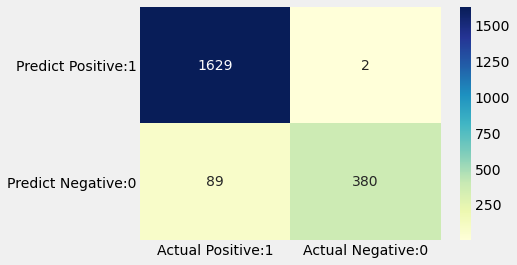

In [688]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

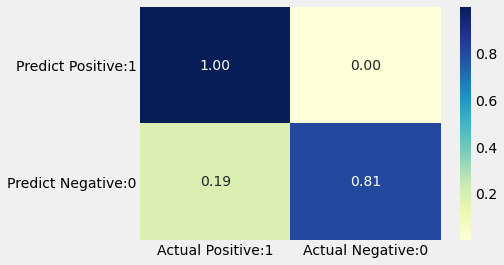

In [689]:

cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

In [690]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      class1       0.95      1.00      0.97      1631
      class2       0.99      0.81      0.89       469

    accuracy                           0.96      2100
   macro avg       0.97      0.90      0.93      2100
weighted avg       0.96      0.96      0.96      2100

